<h2>Charger et lire le dataset</h2>

In [9]:
import pandas as pd

# Lire le fichier CSV
df = pd.read_csv("C:/Users/SARA/Documents/cours_ynov_B3/Aprojet_pro/datast/final/films_fusionnes_final.csv", encoding='utf-8', sep=",")

# Afficher les 5 premières lignes
print(df.head(2))


   ID     Titre                    Genre Pays_origine     Budget    Recettes  \
0   1    #Alive  Action Horreur Thriller  South Korea  6300000.0  13416285.0   
1   2  #Iamhere          Comédie Romance          NaN        0.0         0.0   

   Nombre_votes  Note_moyenne Realisateurs                 Acteurs_principaux  \
0        3354.0          7.26       Cho Il  유아인, Park Shin-hye, 이현욱, 진소연, 김학선   
1         153.0          5.60          NaN                                NaN   

   Date_sortie  
0         2020  
1         2020  


In [10]:
# Supposons que ton DataFrame s'appelle df

# Afficher la liste des colonnes
print("Colonnes du DataFrame :")
print(df.columns)

# Compter les valeurs manquantes par colonne
print("\nNombre de valeurs manquantes (NaN) par colonne :")
print(df.isna().sum())

Colonnes du DataFrame :
Index(['ID', 'Titre', 'Genre', 'Pays_origine', 'Budget', 'Recettes',
       'Nombre_votes', 'Note_moyenne', 'Realisateurs', 'Acteurs_principaux',
       'Date_sortie'],
      dtype='object')

Nombre de valeurs manquantes (NaN) par colonne :
ID                       0
Titre                    0
Genre                   46
Pays_origine          3113
Budget                   0
Recettes                 0
Nombre_votes             0
Note_moyenne           453
Realisateurs          2493
Acteurs_principaux    2497
Date_sortie              0
dtype: int64


In [11]:
# Afficher les 10 genres les plus fréquents
genre_counts = df['Genre'].value_counts()

print("Les genres les plus produits :")
print(genre_counts.head(10))

Les genres les plus produits :
Genre
Drame               389
Comédie             234
Documentaire        227
Horreur             111
Comédie Drame        96
Horreur Thriller     88
Drame Romance        72
Comédie Romance      66
Thriller             60
Romance Drame        59
Name: count, dtype: int64


In [12]:
# Remplacer les cas avec un espace par un trait d'union, insensible à la casse
df['Genre'] = df['Genre'].str.replace(r'(?i)Science Fiction', 'science-fiction', regex=True)


In [13]:
df = df.dropna(subset=['Genre'])  # supprimer les NaN



print(df.head())


   ID                              Titre                            Genre  \
0   1                             #Alive          Action Horreur Thriller   
1   2                           #Iamhere                  Comédie Romance   
2   3  (C)ANSWERS: The Answers to Cancer                     Documentaire   
3   4                      (UN)Ideal Man  Comédie science-fiction Romance   
4   5            ...Watch Out, We're Mad                   Comédie Action   

  Pays_origine     Budget    Recettes  Nombre_votes  Note_moyenne  \
0  South Korea  6300000.0  13416285.0        3354.0          7.26   
1          NaN        0.0         0.0         153.0          5.60   
2          NaN   555000.0         0.0           0.0           NaN   
3          NaN  2441680.0         0.0          14.0          5.80   
4          NaN        0.0         0.0          92.0          5.40   

  Realisateurs                 Acteurs_principaux  Date_sortie  
0       Cho Il  유아인, Park Shin-hye, 이현욱, 진소연, 김학선        

In [14]:
df['Genre'] = df['Genre'].str.split(' ')

# Nettoyer espaces autour
df['Genre'] = df['Genre'].apply(lambda genres: [g.strip() for g in genres])

# Exploser
df_exploded = df.explode('Genre').reset_index(drop=True)

print(df_exploded.head())

   ID     Titre     Genre Pays_origine     Budget    Recettes  Nombre_votes  \
0   1    #Alive    Action  South Korea  6300000.0  13416285.0        3354.0   
1   1    #Alive   Horreur  South Korea  6300000.0  13416285.0        3354.0   
2   1    #Alive  Thriller  South Korea  6300000.0  13416285.0        3354.0   
3   2  #Iamhere   Comédie          NaN        0.0         0.0         153.0   
4   2  #Iamhere   Romance          NaN        0.0         0.0         153.0   

   Note_moyenne Realisateurs                 Acteurs_principaux  Date_sortie  
0          7.26       Cho Il  유아인, Park Shin-hye, 이현욱, 진소연, 김학선         2020  
1          7.26       Cho Il  유아인, Park Shin-hye, 이현욱, 진소연, 김학선         2020  
2          7.26       Cho Il  유아인, Park Shin-hye, 이현욱, 진소연, 김학선         2020  
3          5.60          NaN                                NaN         2020  
4          5.60          NaN                                NaN         2020  


In [15]:
# Supposons que ton DataFrame final s'appelle df_exploded
# Afficher les 20 premières lignes avec les colonnes 'Titre' et 'Genre' (adapte le nom de la colonne titre)
import unicodedata

def clean_text(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')

df_exploded['Titre'] = df_exploded['Titre'].apply(clean_text)
df_exploded['Genre'] = df_exploded['Genre'].apply(clean_text)

print(df_exploded[['Titre', 'Genre']].head(20))


                                        Titre            Genre
0                                      #Alive           Action
1                                      #Alive          Horreur
2                                      #Alive         Thriller
3                                    #Iamhere          Comedie
4                                    #Iamhere          Romance
5           (C)ANSWERS: The Answers to Cancer     Documentaire
6                               (UN)Ideal Man          Comedie
7                               (UN)Ideal Man  science-fiction
8                               (UN)Ideal Man          Romance
9                     ...Watch Out, We're Mad          Comedie
10                    ...Watch Out, We're Mad           Action
11                        10 Days Without Mum         Familial
12                        10 Days Without Mum          Comedie
13                   10 Days with Santa Claus          Comedie
14  10 Things We Should Do Before We Break Up          

In [16]:
# Afficher les 10 genres les plus fréquents
genre_counts = df_exploded['Genre'].value_counts()

print("Les genres les plus produits :")
print(genre_counts.head(10))

Les genres les plus produits :
Genre
Drame          1648
Comedie        1213
Thriller        989
Action          823
Horreur         663
Romance         490
Aventure        480
Policier        420
Familial        396
Fantastique     391
Name: count, dtype: int64


<h2>les 10 genres les plus produits </h2>


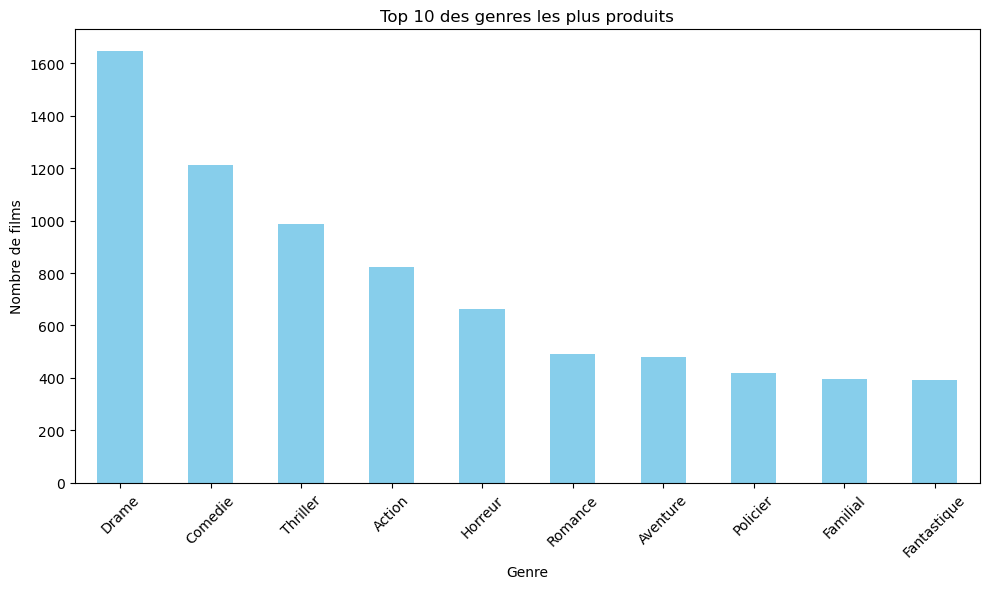

In [17]:
import matplotlib.pyplot as plt

genre_counts = df_exploded['Genre'].value_counts().head(10)

# Tracer un graphique à barres
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 des genres les plus produits')
plt.xlabel('Genre')
plt.ylabel('Nombre de films')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>Moyenne des revenus par genre</h2>

In [18]:

# Séparer les genres multiples (séparés par '|') en plusieurs lignes
df_exploded_r = df_exploded.assign(genre=df['Genre'].str.split('|')).explode('Genre')

# Calculer la moyenne des revenus (Column18) par genre
revenus_moyens = df_exploded_r.groupby('Genre')['Recettes'].mean().reset_index()

# Trier par revenu moyen décroissant
revenus_moyens = revenus_moyens.sort_values(by='Recettes', ascending=False)

print(revenus_moyens.head(10))

              Genre      Recettes
2          Aventure  1.028989e+08
22  science-fiction  6.944640e+07
0            Action  6.168462e+07
9          Histoire  5.765841e+07
1         Animation  5.508482e+07
7       Fantastique  5.499177e+07
6          Familial  5.261725e+07
14          Musique  5.002649e+07
8            Guerre  3.725098e+07
15          Mystere  2.663806e+07


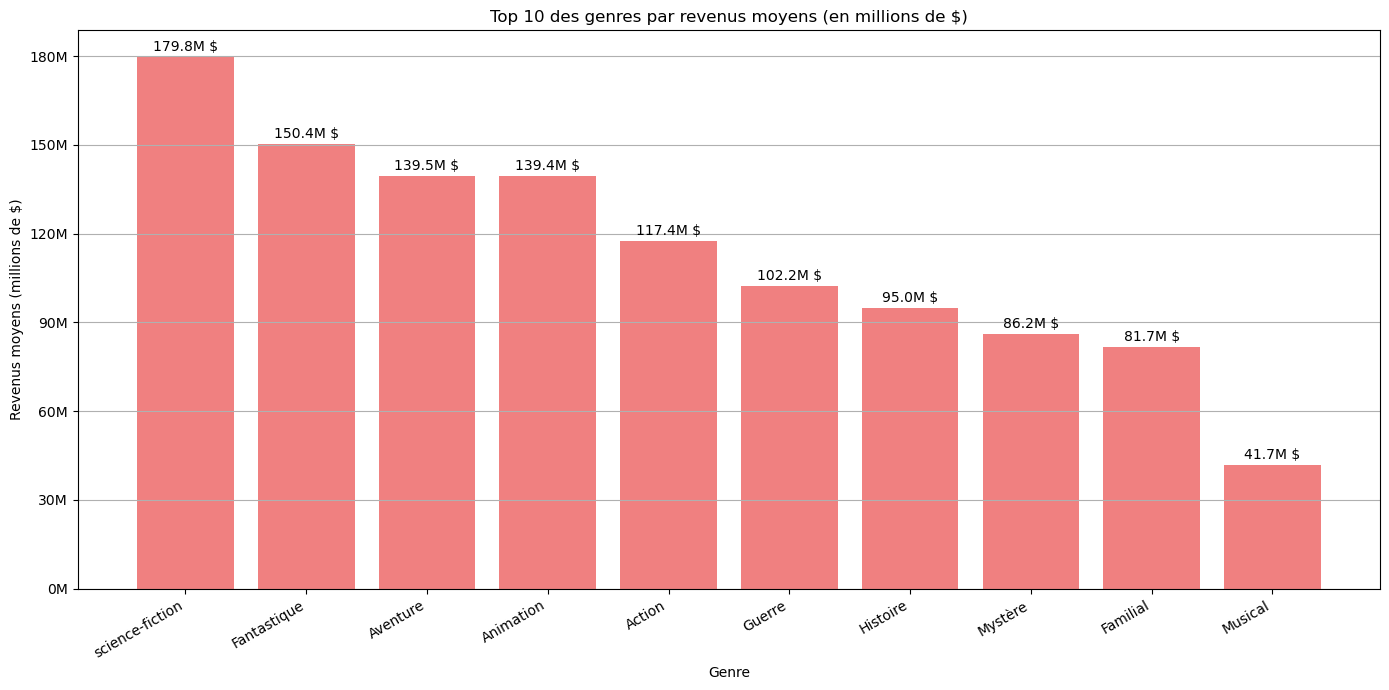

In [ ]:
# S'assurer que le genre est bien une chaîne
df['Genre'] = df['Genre'].astype(str)
df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip())

# Correction des noms de genres incohérents
df['Genre'] = df['Genre'].replace({
    'science fiction': 'Science-fiction',
    'Science fiction': 'Science-fiction',
    'Sci fi': 'Science-fiction',
    'sci-fi': 'Science-fiction',
    'sci fi': 'Science-fiction',
    
})

# Enlever les crochets, apostrophes, etc.
df['Genre'] = df['Genre'].str.replace(r"[\[\]']", '', regex=True)

# Filtrer uniquement les films avec des recettes valides
df_revenu = df[df['Recettes'] > 0].copy()

# Conversion en millions de dollars
df_revenu['Recettes_millions'] = df_revenu['Recettes'] / 1_000_000

# Calcul des revenus moyens par genre
revenus_moyens = df_revenu.groupby('Genre')['Recettes_millions'].mean().sort_values(ascending=False).head(10)

# Raccourcir les labels longs
labels = [g if len(g) < 25 else g[:22] + "..." for g in revenus_moyens.index]

# Graphique
plt.figure(figsize=(14, 7))
bars = plt.bar(labels, revenus_moyens.values, color='lightcoral')

# Ajouter les valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}M $", ha='center', va='bottom')

# Titres et axes
plt.title('Top 10 des genres par revenus moyens (en millions de $)')
plt.xlabel('Genre')
plt.ylabel('Revenus moyens (millions de $)')
plt.xticks(rotation=30, ha='right')

# Axe Y dynamique et clair
max_val = revenus_moyens.max()
step = int(np.ceil(max_val / 6))  # espace entre ticks
yticks = np.arange(0, max_val + step, step)
plt.yticks(yticks, [f"{y:.0f}M" for y in yticks])

plt.tight_layout()
plt.grid(axis='y')
plt.show()


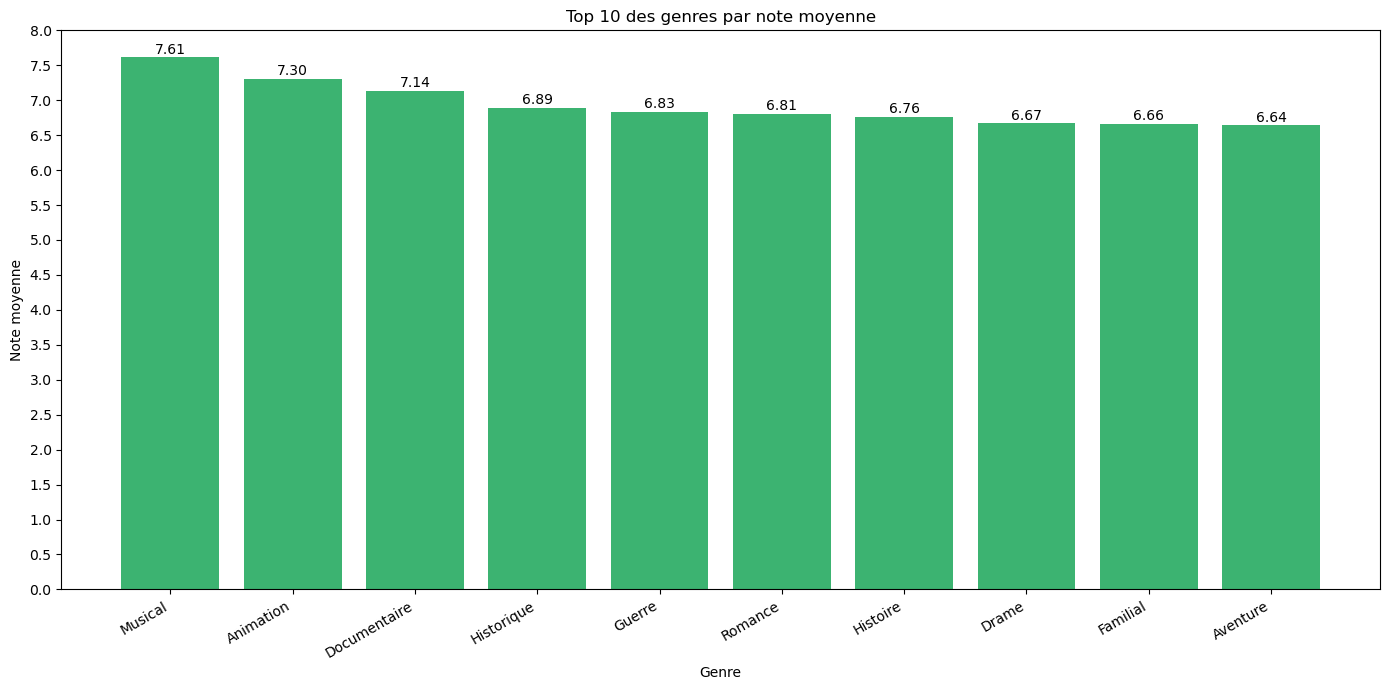

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import unicodedata

# Garder un seul genre par film (le premier)
df['Genre'] = df['Genre'].astype(str)
df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip())

# Correction simple des noms de genres
df['Genre'] = df['Genre'].replace({
    'science fiction': 'science-fiction',
    'Science fiction': 'Science-fiction',
    'Sci fi': 'Science-fiction',
    # Ajoutez d'autres si nécessaire
})

# Supprimer les crochets et apostrophes
df['Genre'] = df['Genre'].str.replace(r"[\[\]']", '', regex=True)

#  Supprimer les genres "tv", "tvfilm", "téléfilm" 
def normalize(genre):
    return unicodedata.normalize('NFKD', genre.lower()).encode('ascii', errors='ignore').decode('utf-8')

genres_a_exclure = ['tv', 'tvfilm', 'telefilm']
df = df[~df['Genre'].apply(lambda g: normalize(g) in genres_a_exclure)]

# Calcul de la note moyenne par genre
notes_moyennes = df.groupby('Genre')['Note_moyenne'].mean().sort_values(ascending=False).head(10)

# Raccourcir les labels pour l'affichage
labels = [g if len(g) < 25 else g[:22] + "..." for g in notes_moyennes.index]

# Graphique
plt.figure(figsize=(14, 7))
bars = plt.bar(labels, notes_moyennes.values, color='mediumseagreen')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.title('Top 10 des genres par note moyenne')
plt.xlabel('Genre')
plt.ylabel('Note moyenne')
plt.xticks(rotation=30, ha='right')

# Axe Y dynamique
max_val = notes_moyennes.max()
step = 0.5
yticks = np.arange(0, max_val + step, step)
plt.yticks(yticks)

plt.tight_layout()
plt.show()


<h2> Revenus totals par Genre</h2>


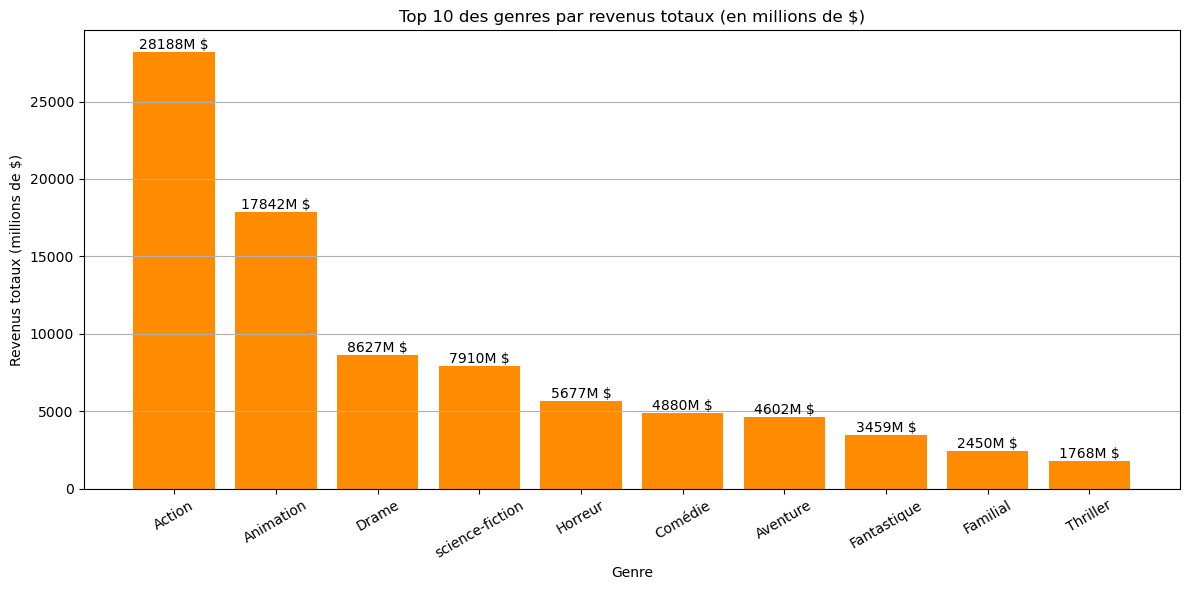

In [ ]:


# Filtrer les films avec des recettes valides uniquement
df_revenu = df[df['Recettes'] > 0].copy()

# Conversion des recettes en millions de dollars
df_revenu['Recettes_millions'] = df_revenu['Recettes'] / 1_000_000

# Calcul des revenus totaux par genre (en millions)
revenus_totaux = df_revenu.groupby('Genre')['Recettes_millions'].sum().sort_values(ascending=False).head(10)

# Raccourcir les labels si nécessaire
labels = [g if len(g) < 25 else g[:22] + "..." for g in revenus_totaux.index]

# Affichage du graphique
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, revenus_totaux.values, color='darkorange')

# Affichage des valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f"{yval:.0f}M $", ha='center', va='bottom')

# 🖋 Titre et axes
plt.title('Top 10 des genres par revenus totaux (en millions de $)')
plt.ylabel('Revenus totaux (millions de $)')
plt.xlabel('Genre')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<h2>Note moyenne par genre + Nombre de films (quantité vs qualité)</h2>
Un genre peut être bien noté mais peu produit. "Combinaison qualité + volume".

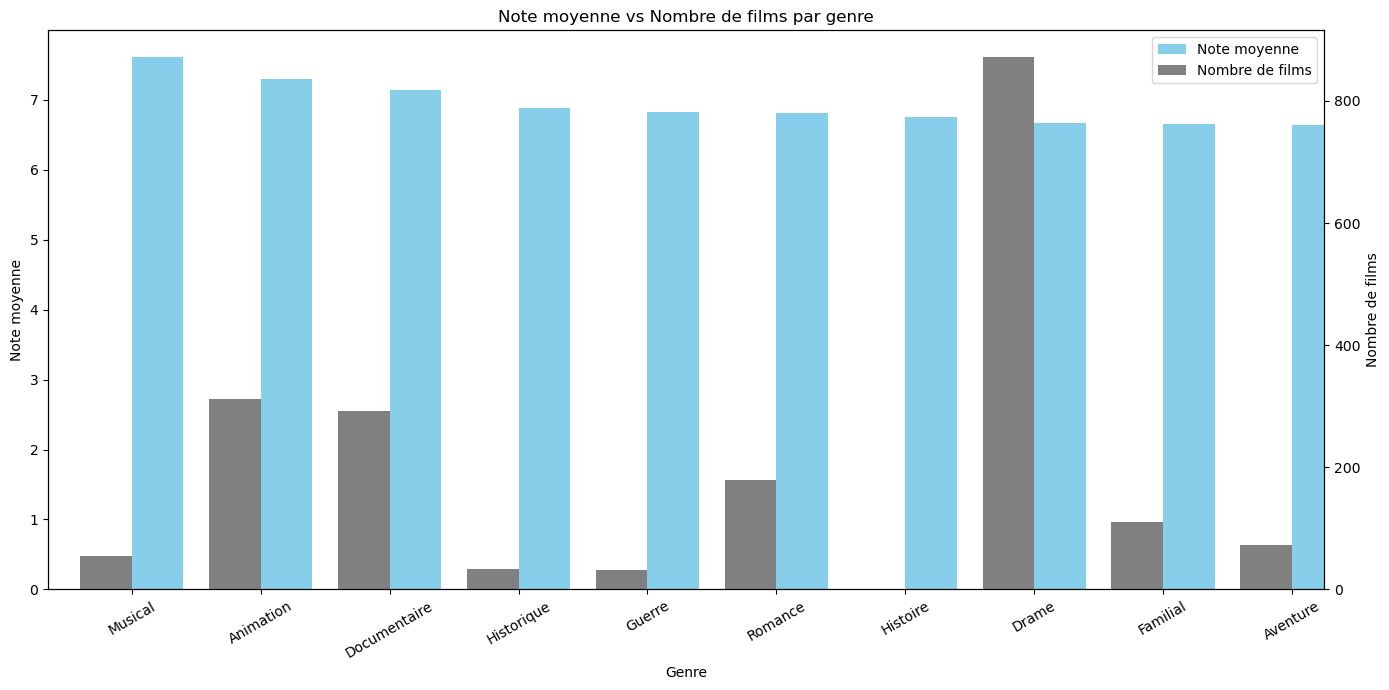

In [23]:
notes_volume = df.groupby('Genre').agg({
    'Note_moyenne': 'mean',
    'Titre': 'count'
}).rename(columns={'Titre': 'Nombre de films'}).sort_values(by='Note_moyenne', ascending=False)

# Affichage combiné (2 axes)
fig, ax1 = plt.subplots(figsize=(14,7))

ax2 = ax1.twinx()

# Barres note moyenne
notes_volume['Note_moyenne'].head(10).plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4, label='Note moyenne')

# Barres nombre de films
notes_volume['Nombre de films'].head(10).plot(kind='bar', ax=ax2, color='gray', position=1, width=0.4, label='Nombre de films')

ax1.set_ylabel('Note moyenne')
ax2.set_ylabel('Nombre de films')
ax1.set_title('Note moyenne vs Nombre de films par genre')
ax1.set_xlabel('Genre')
ax1.set_xticklabels(notes_volume.index[:10], rotation=30)

# Ajouter légendes
# On combine les handles et labels des deux axes pour avoir une légende unique
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()


<h2>Rentabilité par genre (Recettes – Budget)</h2>
Quelle est la marge ou le retour sur investissement moyen(RIO) ?</br>
ps: Un ROI de 1.0 = le film a remboursé son budget sans bénéfice.</br>
    Un ROI de > 2.0 = le film a généré le double de son coût.</br>
    Un ROI de < 1.0 = perte financière.</br>

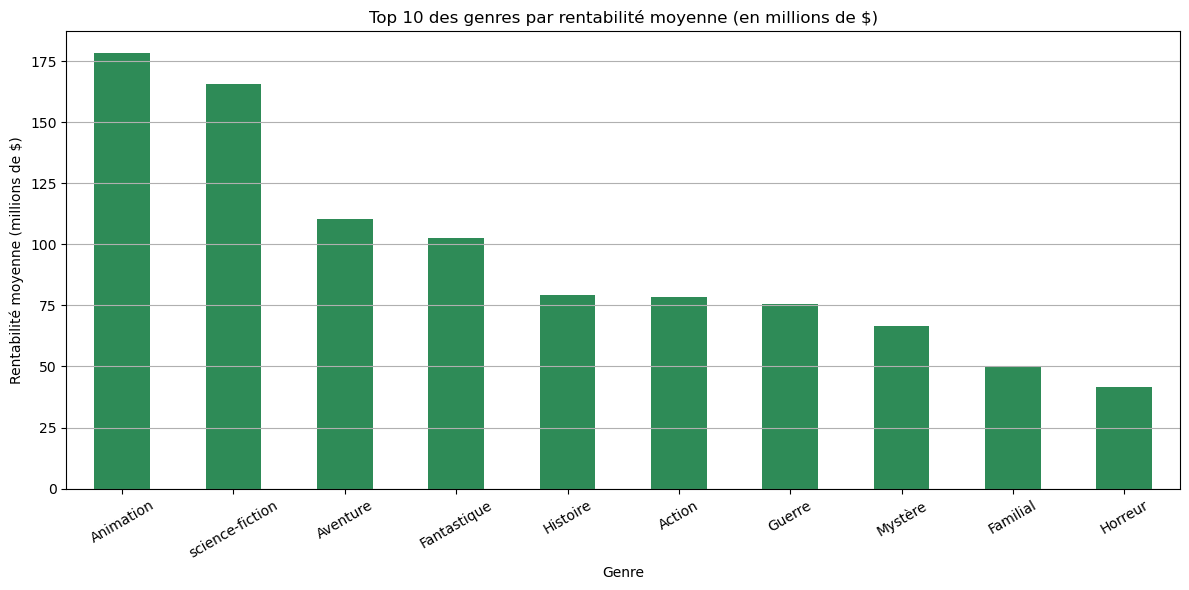

In [ ]:


# Filtrer les lignes valides : budget, recettes > 0
df_filtre = df[
    (df['Budget'] > 0) & 
    (df['Recettes'] > 0) 
].copy()

# Conversion en millions de dollars
df_filtre['Budget_millions'] = df_filtre['Budget'] / 1_000_000
df_filtre['Recettes_millions'] = df_filtre['Recettes'] / 1_000_000

# Calcul de la rentabilité (en millions de $)
df_filtre['Rentabilite_millions'] = df_filtre['Recettes_millions'] - df_filtre['Budget_millions']

# Rentabilité moyenne par genre (top 10)
rentabilite_moyenne = df_filtre.groupby('Genre')['Rentabilite_millions'].mean().sort_values(ascending=False).head(10)

# Affichage du graphique
rentabilite_moyenne.plot(kind='bar', figsize=(12, 6), color='seagreen')

plt.title('Top 10 des genres par rentabilité moyenne (en millions de $)')
plt.ylabel('Rentabilité moyenne (millions de $)')
plt.xlabel('Genre')
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


<h2>Taux d’échec par genre</h2>
% de films d’un genre qui n’ont pas dépassé leur budget

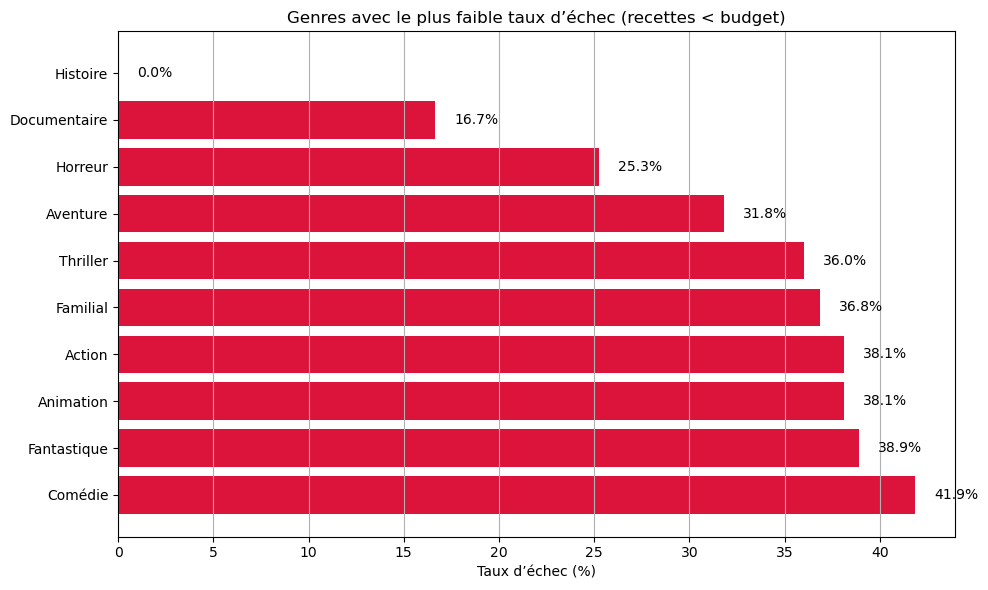

In [ ]:

# Filtrer les lignes valides : budget et recettes > 0
df_valid = df[(df['Budget'] > 0) & (df['Recettes'] > 0)].copy()

# Déterminer les échecs (recettes < budget)
df_valid['Echec'] = df_valid['Recettes'] < df_valid['Budget']

# Calcul du taux d’échec moyen par genre
taux_echec = df_valid.groupby('Genre')['Echec'].mean().sort_values().head(10)

# Conversion en pourcentage
taux_echec_percent = taux_echec * 100

# Affichage
plt.figure(figsize=(10, 6))
bars = plt.barh(taux_echec_percent.index, taux_echec_percent.values, color='crimson')

# Ajouter les pourcentages sur les barres
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             f"{width:.1f}%", va='center', ha='left')


plt.title('Genres avec le plus faible taux d’échec (recettes < budget)')
plt.xlabel('Taux d’échec (%)')
plt.gca().invert_yaxis()  # Le genre avec le taux le plus bas en haut
plt.tight_layout()
plt.grid(axis='x')
plt.show()


<h2>Revenus moyens par pays de production</h2>

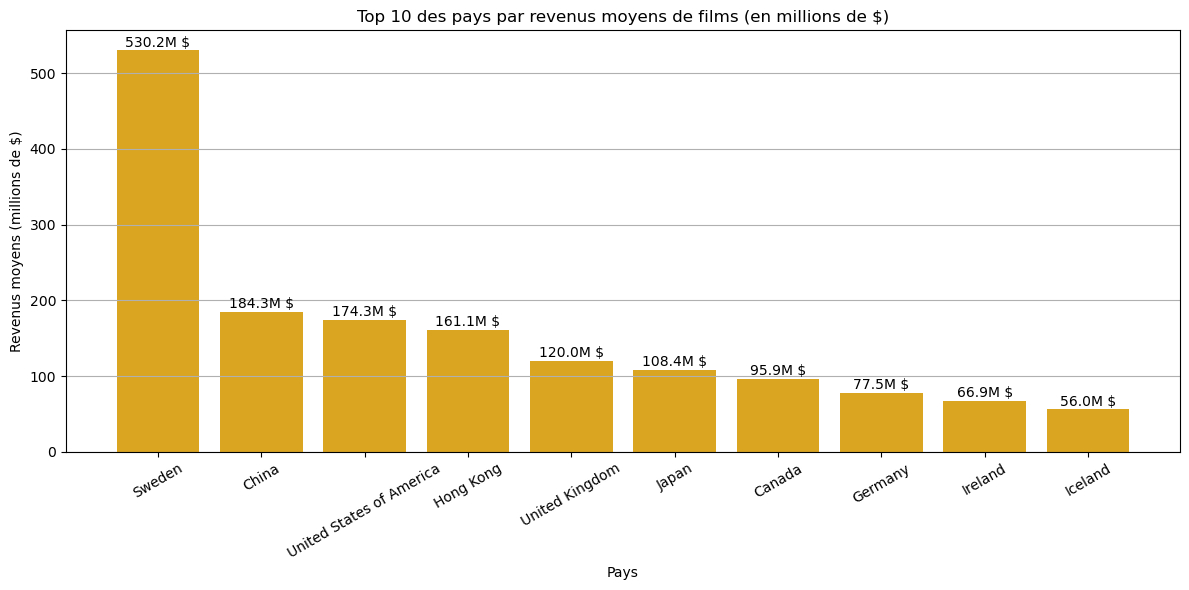

In [ ]:

#  Nettoyer la colonne Pays pour n’avoir qu’un seul pays par film
df['Pays_origine'] = df['Pays_origine'].astype(str)
df['Pays_origine'] = df['Pays_origine'].apply(lambda x: x.split(',')[0].strip())

#  Garder uniquement les films avec recettes valides
df_pays = df[df['Recettes'] > 0].copy()

#  Conversion des recettes en millions
df_pays['Recettes_millions'] = df_pays['Recettes'] / 1_000_000

#  Calcul des revenus moyens par pays
revenus_pays = df_pays.groupby('Pays_origine')['Recettes_millions'].mean().sort_values(ascending=False).head(10)

#  Affichage du graphique
plt.figure(figsize=(12, 6))
bars = plt.bar(revenus_pays.index, revenus_pays.values, color='goldenrod')

# Ajouter les valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}M $", ha='center', va='bottom')


plt.title('Top 10 des pays par revenus moyens de films (en millions de $)')
plt.ylabel('Revenus moyens (millions de $)')
plt.xlabel('Pays')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<h2>Rentabilité moyenne par pays</h2>

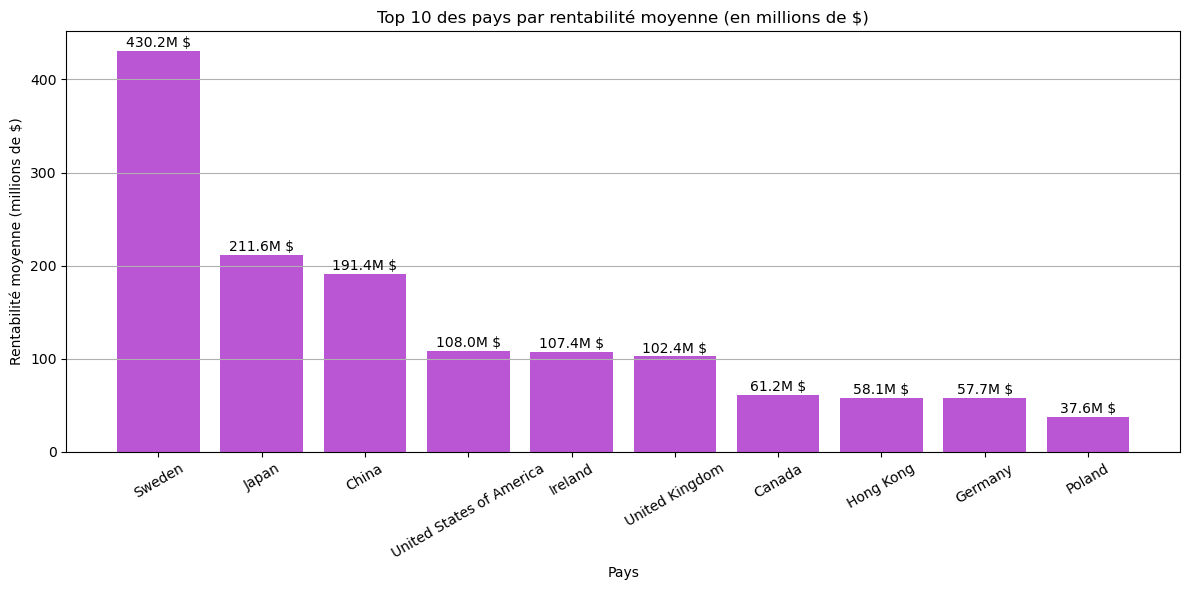

In [ ]:


# Nettoyer la colonne Pays
df['Pays_origine'] = df['Pays_origine'].astype(str)
df['Pays_origine'] = df['Pays_origine'].apply(lambda x: x.split(',')[0].strip())

# Ne garder que les lignes avec budget ET recettes > 0
df_rentable = df[(df['Recettes'] > 0) & (df['Budget'] > 0)].copy()

# Calcul de la rentabilité en millions de dollars
df_rentable['Rentabilite_millions'] = (df_rentable['Recettes'] - df_rentable['Budget']) / 1_000_000

# Moyenne de rentabilité par pays
rentabilite_pays = df_rentable.groupby('Pays_origine')['Rentabilite_millions'].mean().sort_values(ascending=False).head(10)

# Affichage du graphique
plt.figure(figsize=(12, 6))
bars = plt.bar(rentabilite_pays.index, rentabilite_pays.values, color='mediumorchid')

# Ajouter les valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}M $", ha='center', va='bottom')


plt.title('Top 10 des pays par rentabilité moyenne (en millions de $)')
plt.ylabel('Rentabilité moyenne (millions de $)')
plt.xlabel('Pays')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<h2>Acteurs les plus rentables (moyenne des recettes des films où ils jouent)</h2>

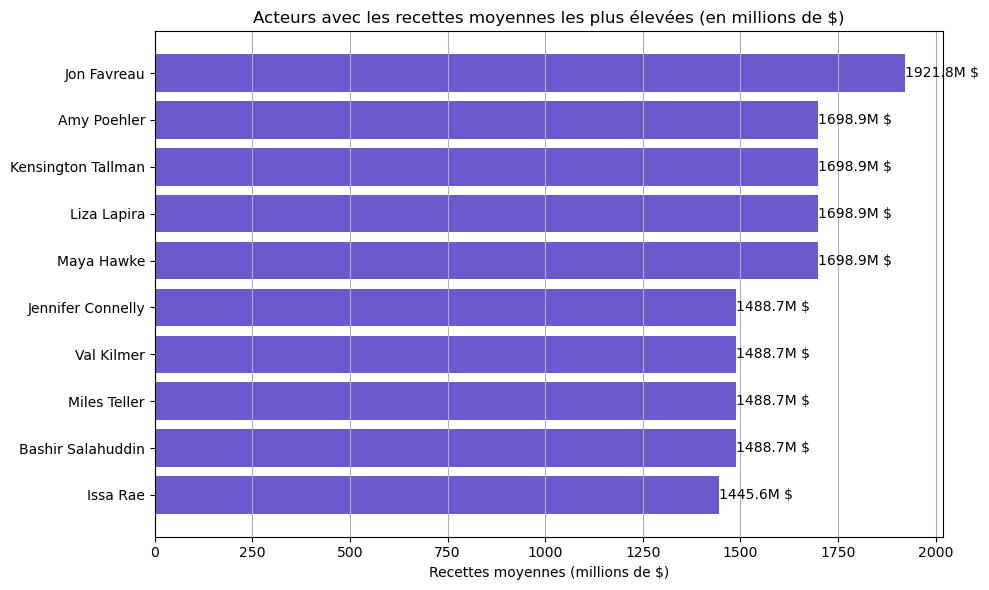

In [ ]:

import unicodedata

#  détecter si une chaîne est ASCII
def est_ascii(s):
    try:
        s.encode('ascii')
        return True
    except:
        return False

#Nettoyer les noms d’acteurs : remplacer les non-ASCII par un placeholder
df['Acteurs_principaux'] = df['Acteurs_principaux'].astype(str)
df['Acteurs_principaux'] = df['Acteurs_principaux'].apply(
    lambda x: x if est_ascii(x) else '[Nom non valide]'
)

# Explosion des lignes si plusieurs acteurs
df_acteurs = df.copy()
df_acteurs['Acteurs_principaux'] = df_acteurs['Acteurs_principaux'].str.split(',')
df_acteurs = df_acteurs.explode('Acteurs_principaux')
df_acteurs['Acteurs_principaux'] = df_acteurs['Acteurs_principaux'].str.strip()

# Garder uniquement les lignes avec recettes valides
df_acteurs = df_acteurs[df_acteurs['Recettes'] > 0].copy()
df_acteurs['Recettes_millions'] = df_acteurs['Recettes'] / 1_000_000

# Calcul des recettes moyennes par acteur
revenus_acteurs = df_acteurs.groupby('Acteurs_principaux')['Recettes_millions'].mean().sort_values(ascending=False).head(10)

# affichage du graphique
plt.figure(figsize=(10, 6))
bars = plt.barh(revenus_acteurs.index, revenus_acteurs.values, color='slateblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{width:.1f}M $", va='center', ha='left')


plt.title("Acteurs avec les recettes moyennes les plus élevées (en millions de $)")
plt.xlabel("Recettes moyennes (millions de $)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(axis='x')
plt.show()


<h2>Acteurs les plus fréquents dans les films à succès</h2>

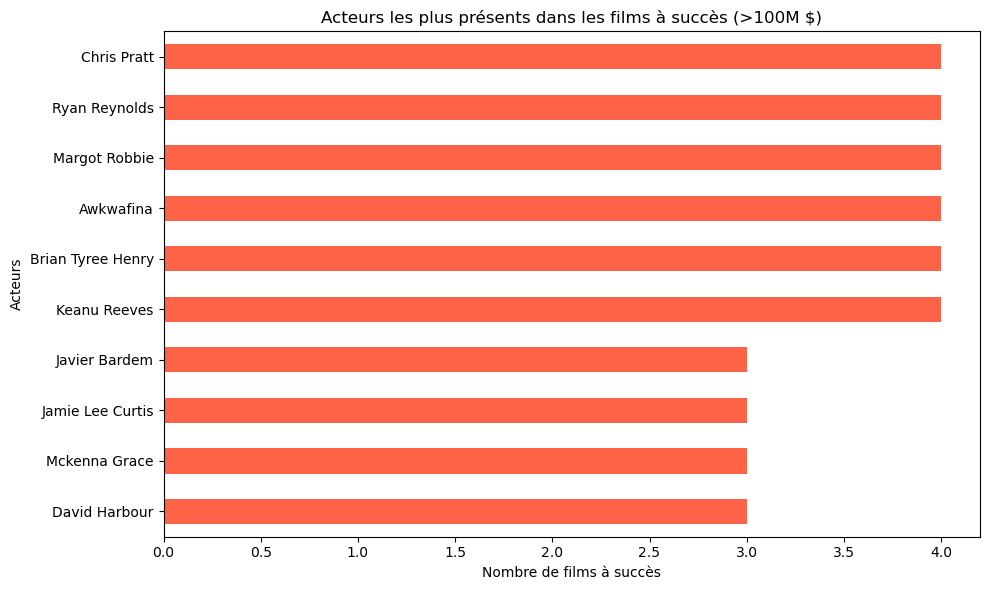

In [29]:
seuil_succes = 100_000_000
df_succes = df[df['Recettes'] > seuil_succes].copy()

# Séparation des acteurs
df_succes = df_succes.assign(Acteurs=df_succes['Acteurs_principaux'].str.split(',')).explode('Acteurs')

# Nettoyage
df_succes['Acteurs'] = df_succes['Acteurs'].str.strip()
df_succes = df_succes[
    df_succes['Acteurs'].notna() & 
    (df_succes['Acteurs'] != '') & 
    (df_succes['Acteurs'] != '[Nom non valide]')
]

# Comptage
acteurs_succes = df_succes['Acteurs'].value_counts().head(10)

# Affichage
acteurs_succes.plot(kind='barh', figsize=(10,6), color='tomato')
plt.title('Acteurs les plus présents dans les films à succès (>100M $)')
plt.xlabel('Nombre de films à succès')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<h2>Réalisateurs les plus rentables </h2>

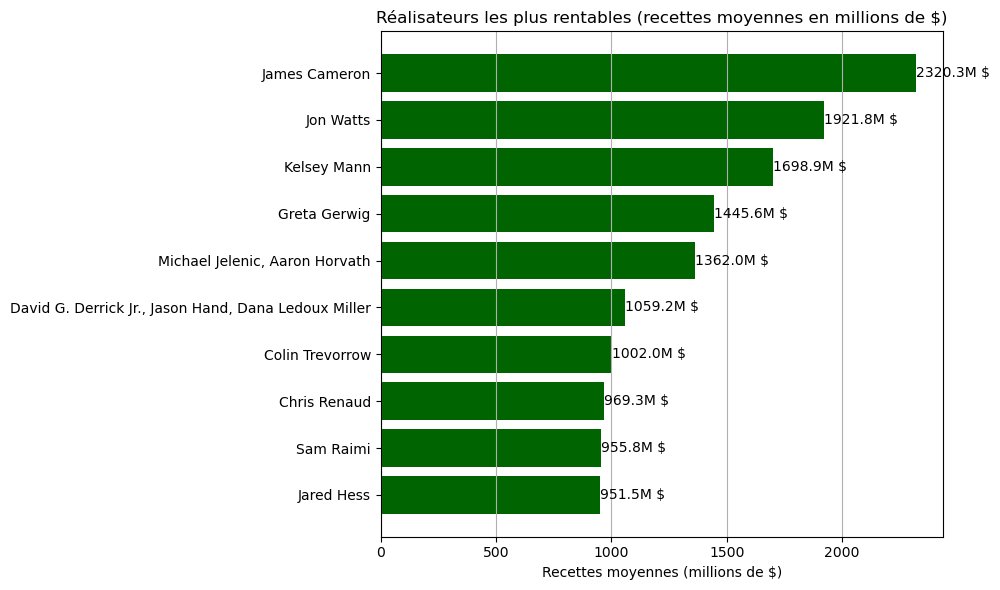

In [ ]:

import unicodedata

#  Fonction pour détecter si une chaîne est ASCII
def est_ascii(s):
    try:
        s.encode('ascii')
        return True
    except:
        return False

# Nettoyage des noms non-ASCII
df['Acteurs_principaux'] = df['Acteurs_principaux'].astype(str)
df['Acteurs_principaux'] = df['Acteurs_principaux'].apply(
    lambda x: x if est_ascii(x) else '[Nom non valide]'
)

df['Realisateurs'] = df['Realisateurs'].astype(str)
df['Realisateurs'] = df['Realisateurs'].apply(
    lambda x: x if est_ascii(x) else '[Nom non valide]'
)

#  Garder uniquement les films avec recettes > 0
df_valid = df[df['Recettes'] > 0].copy()
df_valid['Recettes_millions'] = df_valid['Recettes'] / 1_000_000

#  Recettes moyennes par réalisateur
revenus_real = df_valid.groupby('Realisateurs')['Recettes_millions'].mean().sort_values(ascending=False).head(10)

#  Graphique horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(revenus_real.index, revenus_real.values, color='darkgreen')


for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{width:.1f}M $", va='center', ha='left')


plt.title('Réalisateurs les plus rentables (recettes moyennes en millions de $)')
plt.xlabel('Recettes moyennes (millions de $)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(axis='x')
plt.show()
